**Created by Sanskar Hasija**

**30dml- Comparison on 36 different models**

**20 August 2021**


# Installing Lazy Predict

In [1]:
from IPython.display import clear_output
!pip3 install -U lazypredict

clear_output()

# Import Libraries

In [2]:
!pip3 install -U pandas==1.2.3 #Upgrading pandas
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import lazypredict
from lazypredict import Supervised
from lazypredict.Supervised import LazyRegressor


plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,5)
num_models = 36   #Number of Models
clear_output()

# Data Pre-Processing

In [3]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/train.csv")

cat_features = ["cat" + str(i) for i in range(10)]
num_features = ["cont" + str(i) for i in range(14)]

for col in cat_features:
    encoder = OrdinalEncoder()
    train[col] = encoder.fit_transform(np.array(train[col]).reshape(-1, 1))
    test[col] = encoder.transform(np.array(test[col]).reshape(-1, 1))
    
X = train.drop(["id", "target"], axis=1)
X_test = test.drop(["id"], axis=1)
y = train["target"]


#Spliting into training and validation set
offset = int(X.shape[0] * 0.67)
X_train, y_train = X[:offset], y[:offset]
X_valid, y_valid = X[offset:], y[offset:]

# MODEL SELECTION 

In [4]:
reg_idx = [i for i in range(num_models)]
noregs_idx = [10,15,23,24,29,32] # Removing 6 models from 42 models. Some of these models are time consuming whereas other require lot of ram.
regs_name =[]
regs = []
for i in range(42):
    regs_name.append(lazypredict.Supervised.REGRESSORS[i][0])
    regs.append(lazypredict.Supervised.REGRESSORS[i][1])

for i in noregs_idx:
    del regs_name[i]
    del regs[i]

In [5]:
print("ALL 36 AVAILABLE REGRESSION MODELS:")
for i in range(num_models):
    print(i+1 , regs_name[i])

ALL 36 AVAILABLE REGRESSION MODELS:
1 AdaBoostRegressor
2 BaggingRegressor
3 BayesianRidge
4 DecisionTreeRegressor
5 DummyRegressor
6 ElasticNet
7 ElasticNetCV
8 ExtraTreeRegressor
9 ExtraTreesRegressor
10 GammaRegressor
11 GeneralizedLinearRegressor
12 GradientBoostingRegressor
13 HistGradientBoostingRegressor
14 HuberRegressor
15 KNeighborsRegressor
16 Lars
17 LarsCV
18 Lasso
19 LassoCV
20 LassoLars
21 LassoLarsCV
22 LassoLarsIC
23 LinearRegression
24 MLPRegressor
25 OrthogonalMatchingPursuit
26 OrthogonalMatchingPursuitCV
27 PassiveAggressiveRegressor
28 PoissonRegressor
29 RANSACRegressor
30 Ridge
31 RidgeCV
32 SGDRegressor
33 TransformedTargetRegressor
34 TweedieRegressor
35 XGBRegressor
36 LGBMRegressor


# Training on 36 different models

In [6]:
results = pd.DataFrame()
for i in range(num_models):
    reg = LazyRegressor(verbose=0, 
                    ignore_warnings=False,
                    custom_metric=None,
                    regressors = [regs[i]])
    models, predictions = reg.fit(X_train, X_valid, y_train, y_valid)
    models.index = [regs_name[i]]
    results = results.append(models)
clear_output()

# RESULTS

In [7]:
results = results.sort_values(by = "RMSE")
results

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
LGBMRegressor,0.06,0.06,0.72,2.71
HistGradientBoostingRegressor,0.06,0.06,0.72,4.01
XGBRegressor,0.06,0.06,0.72,30.15
GradientBoostingRegressor,0.04,0.04,0.73,206.35
ExtraTreesRegressor,0.02,0.02,0.74,186.99
BayesianRidge,0.02,0.02,0.74,0.71
ElasticNetCV,0.02,0.02,0.74,2.78
LassoCV,0.02,0.02,0.74,2.46
LassoLarsIC,0.02,0.02,0.74,0.51
LassoLarsCV,0.02,0.02,0.74,1.94


## TOP 5 Performing Models (BY RMSE)

In [8]:
results.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
LGBMRegressor,0.06,0.06,0.72,2.71
HistGradientBoostingRegressor,0.06,0.06,0.72,4.01
XGBRegressor,0.06,0.06,0.72,30.15
GradientBoostingRegressor,0.04,0.04,0.73,206.35
ExtraTreesRegressor,0.02,0.02,0.74,186.99


# Comparison Plots

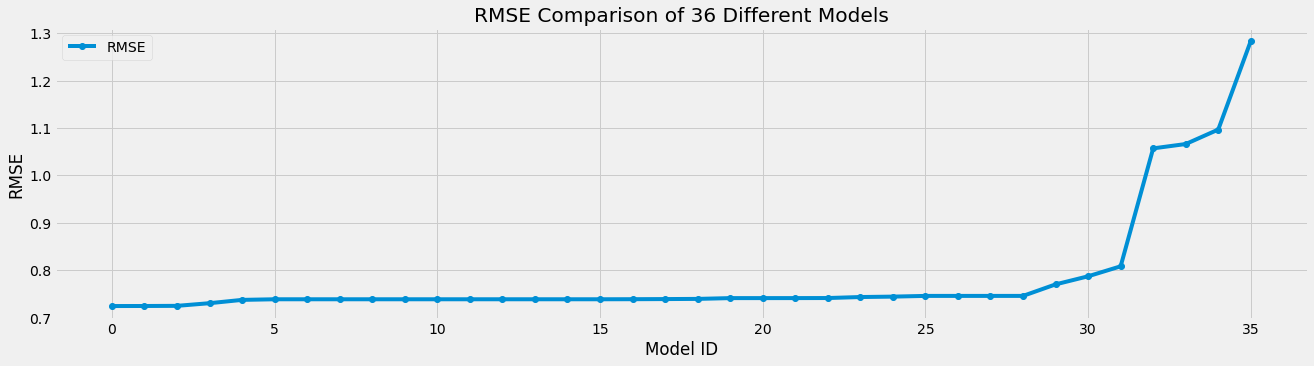

In [9]:
plt.plot(reg_idx , results["RMSE"],label = "RMSE" ,marker='o')
plt.xlabel("Model ID")
plt.ylabel("RMSE")
plt.title("RMSE Comparison of 36 Different Models")
plt.legend()
plt.show()

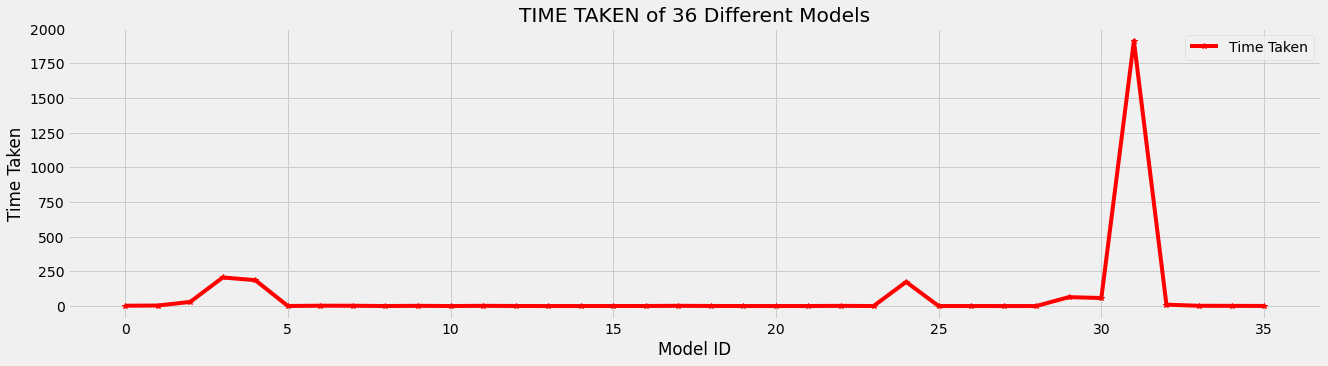

In [10]:
plt.plot(reg_idx , results["Time Taken"],label = "Time Taken" ,marker='*' , color = 'r')
plt.xlabel("Model ID")
plt.ylabel("Time Taken")
plt.title("TIME TAKEN of 36 Different Models")
plt.legend()
plt.show()

# <center>If you find this notebook useful, support with an upvote!</center>